In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.datasets import load_boston
import pandas as pd

%matplotlib inline

from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [6]:
# load the boston housing data
boston = load_boston()

In [7]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [11]:
boston.data.shape

(506, 13)

In [14]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [15]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
bost = pd.DataFrame(boston.data)
bost.columns = boston.feature_names
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
print(boston.target.shape)

(506,)


In [22]:
# add target price
bost['PRICE'] = boston.target

In [23]:
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#EDA

In [24]:
bost.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


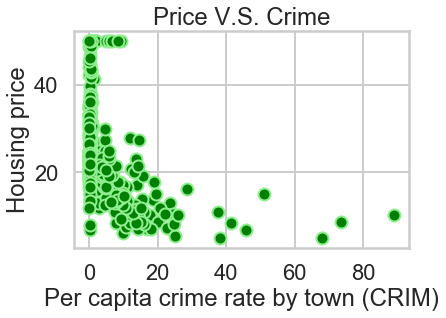

In [33]:
plt.scatter(bost.CRIM, bost.PRICE, c='green',edgecolors='lightgreen')
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing price")
plt.title("Price V.S. Crime")
plt.show()


### Part 2 Checkup Exercise Set I
Exercise: What kind of relationship do you see? e.g. positive, negative? linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?

Exercise: Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.

Exercise: What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.

### Describe relationship 
#### Negative, non-linear; same CRIM could correpsond to different housing for CRIM in the range of 0 to 15. There are a few outliers in the CRIM range of 0 to 15

### Scatter plot between RM and PRICE
#### Numbers of room and housing price are positively related; the relationship looks linear; there a few outliers that seem to have high influence and high leverage (3.561, 27.5) (8.780, 21.9) or high influence and low leverage(5.875, 50).

In [44]:
bost[(bost.RM>5)&(bost.RM<6)&(bost.PRICE==50)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0


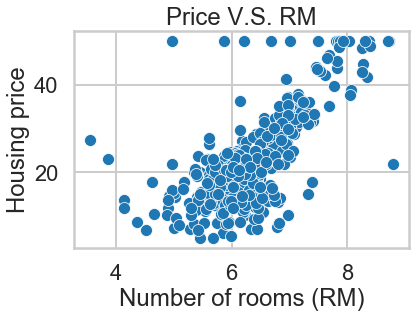

In [57]:
sns.scatterplot(x='RM', y='PRICE', data=bost)
plt.xlabel('Number of rooms (RM)')
plt.ylabel('Housing price')
plt.title('Price V.S. RM')
plt.show()

### your turn: scatter plot between PTRATIO and PRICE
#### Pupil-to-teacher ratio in schools seems to be negatively related to housing price, and relationship seems linear.

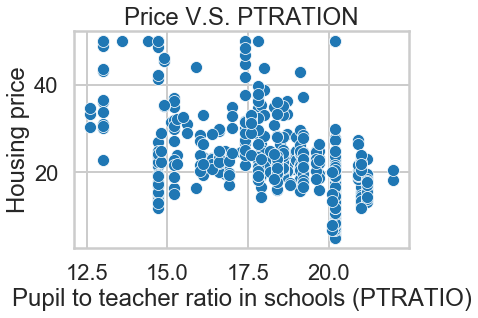

In [58]:
sns.scatterplot(x='PTRATIO', y='PRICE', data=bost)
plt.xlabel('Pupil to teacher ratio in schools (PTRATIO)')
plt.ylabel('Housing price')
plt.title('Price V.S. PTRATION')
plt.show()

### your turn: create some other scatter plots
#### Weighted distances to 5 boston employment centers are positively related to housing price.

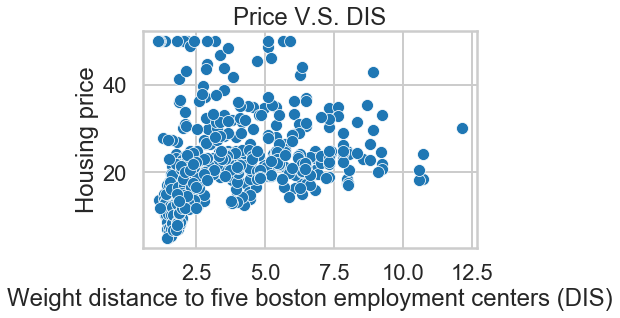

In [59]:
sns.scatterplot(x='DIS', y='PRICE', data=bost)
plt.xlabel('Weight distance to five boston employment centers (DIS)')
plt.ylabel('Housing price')
plt.title('Price V.S. DIS')
plt.show()

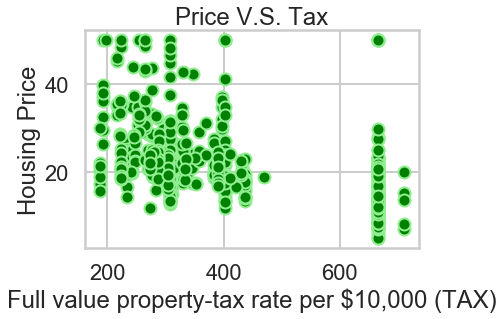

In [63]:
plt.scatter(bost.TAX, bost.PRICE, c='green', edgecolors='lightgreen')
plt.xlabel('Full value property-tax rate per $10,000 (TAX)')
plt.ylabel('Housing Price')
plt.title('Price V.S. Tax')
plt.show()

## More Scatterplots using Seaborn

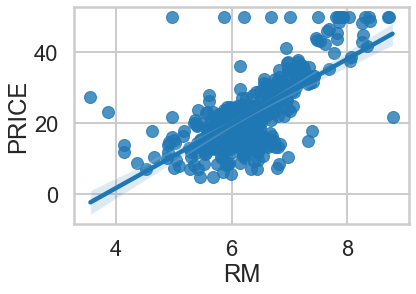

In [66]:
# plot with regression
sns.regplot(x='RM', y='PRICE', data=bost, fit_reg=True)

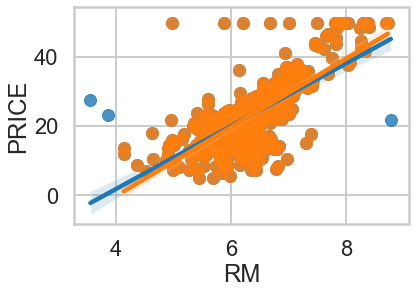

In [70]:
# Remove a few outliers to see change of linear regression line
bost_ed = bost[(bost.RM>4)&(bost.RM!=8.780)]
sns.regplot(x='RM', y='PRICE', data=bost, fit_reg=True)
sns.regplot(x='RM', y='PRICE', data=bost_ed, fit_reg=True)
plt.show()

### Histograms

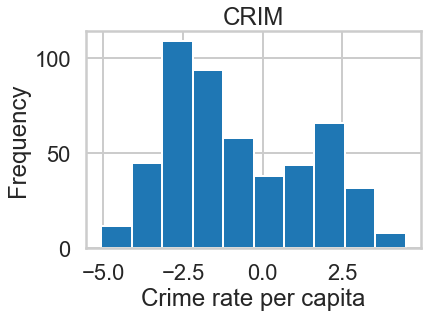

In [72]:
plt.hist(np.log(bost.CRIM))
plt.title('CRIM')
plt.xlabel('Crime rate per capita')
plt.ylabel('Frequency')
plt.show()

### Part 2 Checkup Exercise Set II

Exercise: In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

Exercise: Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.

Taking logarithm of data is to scale properly so that the bins with small numbers of data points can also be seen clearly. If not taken logarithm, CRIM beyond 20 cannot be seen in histogram.

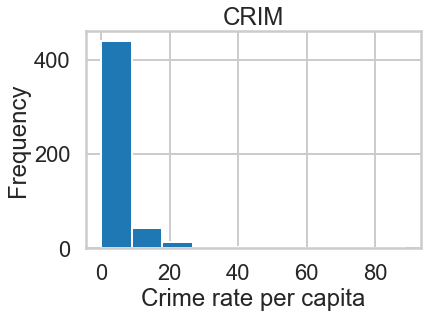

In [74]:
plt.hist(bost.CRIM, bins=10)
plt.title('CRIM')
plt.xlabel('Crime rate per capita')
plt.ylabel('Frequency')
plt.show()

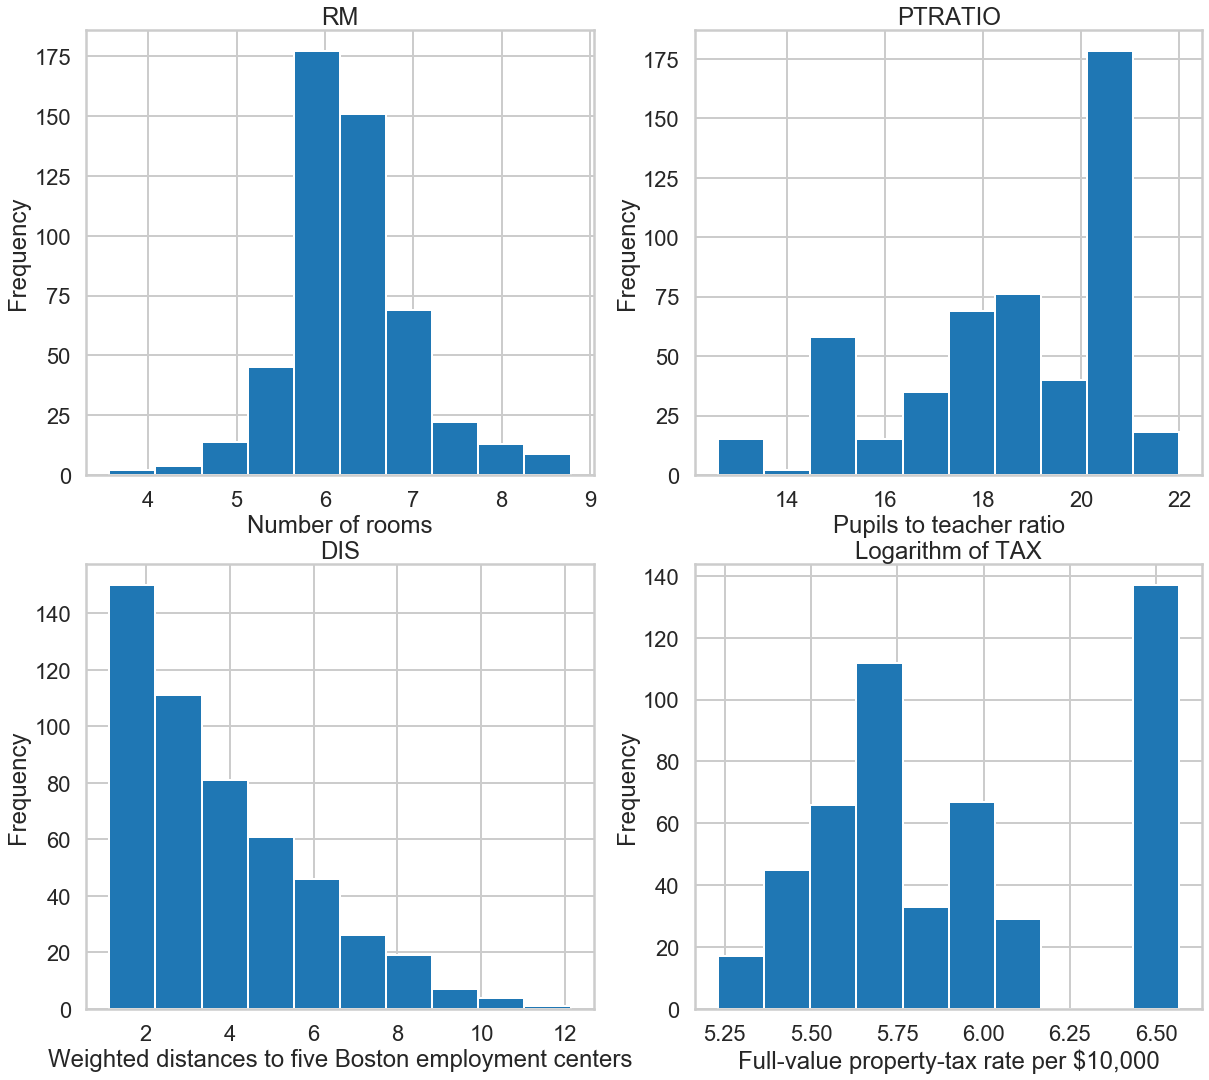

In [77]:
# Subplot

fig, axs = plt.subplots(2,2, figsize=(20,18))

axs[0,0].hist(bost.RM)
axs[0,0].set_title('RM')
axs[0,0].set_xlabel('Number of rooms')
axs[0,0].set_ylabel('Frequency')
axs[0,1].hist(bost.PTRATIO)
axs[0,1].set_title('PTRATIO')
axs[0,1].set_xlabel('Pupils to teacher ratio')
axs[0,1].set_ylabel('Frequency')
axs[1,0].hist(bost.DIS)
axs[1,0].set_title('DIS')
axs[1,0].set_xlabel('Weighted distances to five Boston employment centers')
axs[1,0].set_ylabel('Frequency')
axs[1,1].hist(np.log(bost.TAX))
axs[1,1].set_title('Logarithm of TAX')
axs[1,1].set_xlabel('Full-value property-tax rate per $10,000')
axs[1,1].set_ylabel('Frequency')
plt.show()